### Soal Latihan

1. Buat Implementasi dengan menggunakan python untuk menghitung Fuzzy Inference System berikut dengan metode tsukamoto

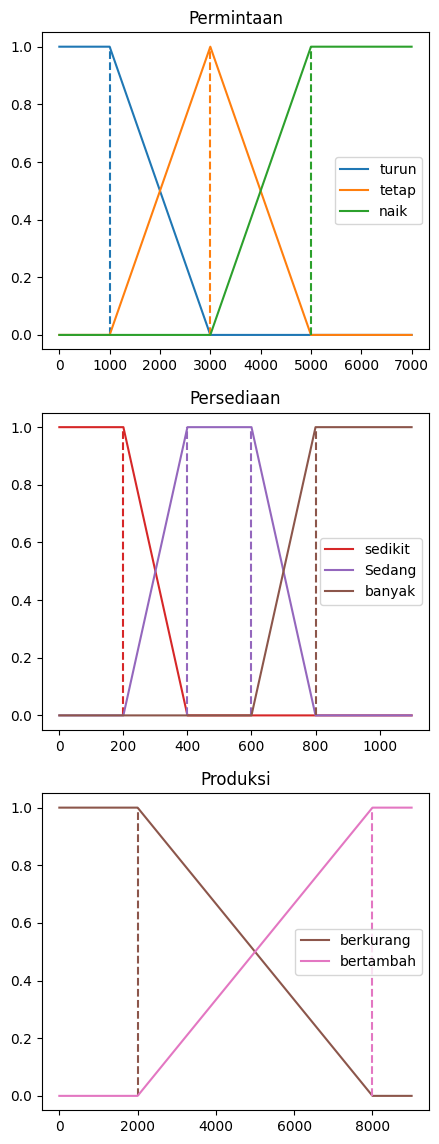

Rule:
- Jika Permintaan **Turun** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Turun** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Turun** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Tetap** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Naik** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Sedang** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Banyak** maka produksi **Berkurang**

In [89]:
class Fuzzy:
    def __init__(self):
        self.max = 0
        self.min = 0

    def down(self, x):
        if self.max == self.min:
            return 0
        return max(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        if self.max == self.min:
            return 0
        return max(0, (x - self.min) / (self.max - self.min))

    def rev_down(self, value):
        return self.max - value * (self.max - self.min)

    def rev_up(self, value):
        return value * (self.max - self.min) + self.min


class Demand(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 1000  # Minimum nilai demand
        self.max = 5000  # Maksimum nilai demand

    def turun(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def tetap(self, x):
        mid = (self.min + self.max) / 2
        if x < self.min or x > self.max:
            return 0
        if x == mid:
            return 1
        return 1 - abs(x - mid) / (mid - self.min)

    def naik(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Stock(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 200  # Minimum nilai stock
        self.max = 800  # Maksimum nilai stock

    def sedikit(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def sedang(self, x):
        mid = (self.min + self.max) / 2
        if x < self.min or x > self.max:
            return 0
        if x == mid:
            return 1
        return 1 - abs(x - mid) / (mid - self.min)

    def banyak(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Production(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 3000  # Minimum produksi
        self.max = 7000  # Maksimum produksi

    def berkurang(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def bertambah(self, fuzzy_value):
        return self.rev_up(fuzzy_value)


# Rule map sesuai dengan aturan
rule_map = {
    ("turun", "sedikit"): "bertambah",
    ("turun", "sedang"): "berkurang",
    ("turun", "banyak"): "berkurang",
    ("tetap", "sedikit"): "bertambah",
    ("tetap", "sedang"): "berkurang",
    ("tetap", "banyak"): "berkurang",
    ("naik", "sedikit"): "bertambah",
    ("naik", "sedang"): "bertambah",
    ("naik", "banyak"): "berkurang",
}


def fuzzy_production_inference(x_demand, x_stock):
    fuzzy_real = 0.0
    fuzzy = 0.0

    for k, v in rule_map.items():
        demand = Demand()
        stock = Stock()
        prod = Production()

        # Hitung nilai fuzzy untuk demand dan stock
        demand_value = getattr(demand, k[0])(x_demand)
        stock_value = getattr(stock, k[1])(x_stock)

        # Agregasi dengan metode minimum
        prod_value = min(demand_value, stock_value)

        # Defuzzifikasi
        x_prod = getattr(prod, v)(prod_value)

        # Hitung centroid
        fuzzy_real += prod_value * x_prod
        fuzzy += prod_value

    # Hitung hasil akhir
    result = fuzzy_real / fuzzy if fuzzy != 0 else 0
    print(f"\nHasil Defuzzifikasi (Centroid): {result:.2f}")
    return result


# Contoh penggunaan
x_demand = 2000
x_stock = 300
result = fuzzy_production_inference(x_demand, x_stock)
print(f"\nProduksi yang disarankan: {result:.2f}")


Hasil Defuzzifikasi (Centroid): 5466.67

Produksi yang disarankan: 5466.67
